In [63]:
# Import all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import the loan dataset

df = pd.read_csv('loan.csv')

C:\Users\eiksnol\AppData\Local\Temp\ipykernel_14756\3641826028.py:3: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan.csv')


In [3]:
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
# finding the shape of the dataset
df.shape

(39717, 111)

In [5]:
# finding how many missing values are present
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [6]:
# finding missing values by percent
missing_percent = round(100*(df.isnull().sum()/len(df.index)), 2)

# display columns with more than 0% missing values
missing_percent[ missing_percent > 0 ]

emp_title                       6.19
emp_length                      2.71
desc                           32.58
title                           0.03
mths_since_last_delinq         64.66
                               ...  
tax_liens                       0.10
tot_hi_cred_lim               100.00
total_bal_ex_mort             100.00
total_bc_limit                100.00
total_il_high_credit_limit    100.00
Length: 68, dtype: float64

In [7]:
# we shall remove all those columns where missing values are more then 30% and take in a new data frame
df1 = df.drop(missing_percent[missing_percent>30].index, axis=1)

In [8]:
df1.shape

(39717, 53)

In [9]:
# finding missing values by percent again
missing_percent = round(100*(df1.isnull().sum()/len(df1.index)), 2)

# display columns with more than 0% missing values
missing_percent[ missing_percent > 0 ]

emp_title                     6.19
emp_length                    2.71
title                         0.03
revol_util                    0.13
last_pymnt_d                  0.18
last_credit_pull_d            0.01
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
pub_rec_bankruptcies          1.75
tax_liens                     0.10
dtype: float64

In [10]:
# check for number of unique values in each column
df1.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

In [11]:
# dropping the columns with 1 unique value as only one unique value are essentially constant and don't provide any meaningful information for analysis
df1 = df1.loc[:, df1.nunique() > 1]
df1.nunique().sort_values().head(10)

term                     2
pub_rec_bankruptcies     3
loan_status              3
verification_status      3
pub_rec                  5
home_ownership           5
grade                    7
inq_last_6mths           9
delinq_2yrs             11
emp_length              11
dtype: int64

In [12]:
# finding unique values in decending order, means which columns are having maximum unique values
df1.nunique().sort_values(ascending=False).head(15)

id                 39717
url                39717
member_id          39717
total_pymnt        37850
total_pymnt_inv    37518
total_rec_int      35148
last_pymnt_amnt    34930
emp_title          28820
revol_bal          21711
title              19615
installment        15383
funded_amnt_inv     8205
total_rec_prncp     7976
annual_inc          5318
recoveries          4040
dtype: int64

In [13]:
# from this we can see emp_title and title are contains large number of unique values which will not help us in analysis, so we should remove them
df1.drop(['emp_title', 'title'], axis=1, inplace=True)

In [14]:
# now from url, member_id and id we can remove any two values are only 1 will be suffice as all are having same number of unique values which
# are equal to number of records, so let's keep the id
df1.drop(['url', 'member_id'], axis=1, inplace=True)

In [15]:
df1.nunique().sort_values(ascending=False).head(15)

id                         39717
total_pymnt                37850
total_pymnt_inv            37518
total_rec_int              35148
last_pymnt_amnt            34930
revol_bal                  21711
installment                15383
funded_amnt_inv             8205
total_rec_prncp             7976
annual_inc                  5318
recoveries                  4040
dti                         2868
collection_recovery_fee     2616
total_rec_late_fee          1356
out_prncp_inv               1138
dtype: int64

In [16]:
# as we need to perform the analysis of loan application so multiple variables like total_rec_int, total_rec_prncp,
# total_rec_late_fee, recoveries, collection_recovery_fee, last_credit_pull_d, last_pymnt_d, out_prncp, out_prncp_inv, recoveries, collection_recovery_fee

df1.drop(['total_rec_int', 'total_rec_prncp', 'total_rec_late_fee', 'last_credit_pull_d', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'out_prncp', 'out_prncp_inv'], axis=1, inplace=True)

In [17]:
df1.shape

(39717, 31)

In [18]:
# finding remaining missing values
df1.isnull().sum()

id                         0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
total_pymnt                0
total_pymnt_inv            0
last_pymnt_amnt            0
pub_rec_bankruptcies     697
dtype: int64

In [19]:
# there are few columns with missing values like emp_length, revol_util, pub_rec_bankruptcies. Let's see the percentage of these missing values
missing_percent = round(100*(df1.isnull().sum()/len(df1.index)), 2)
missing_percent[ missing_percent > 0 ]

emp_length              2.71
revol_util              0.13
pub_rec_bankruptcies    1.75
dtype: float64

In [20]:
# as these percentage is very less, removing these missing values will not affect the analysis
df1.dropna(subset=['emp_length', 'revol_util', 'pub_rec_bankruptcies'], inplace=True)

In [21]:
df1.isnull().sum()

id                      0
loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
zip_code                0
addr_state              0
dti                     0
delinq_2yrs             0
earliest_cr_line        0
inq_last_6mths          0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
total_pymnt             0
total_pymnt_inv         0
last_pymnt_amnt         0
pub_rec_bankruptcies    0
dtype: int64

In [22]:
df1.loan_status.value_counts()

Fully Paid     31534
Charged Off     5266
Current         1098
Name: loan_status, dtype: int64

In [23]:
# loan which are on going are not considered from this analysis, removing the loans with Current status
df1 = df1[df1['loan_status'] != 'Current']

In [24]:
# finding the datatypes of all columns
df1.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
delinq_2yrs               int64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util               object
total_acc                 int64
total_pymnt             float64
total_pymnt_inv         float64
last_pymnt_amnt         float64
pub_rec_bankruptcies    float64
dtype: o

In [25]:
# term should be numeric data but here it is object, let's find out
df1.term.value_counts()

 36 months    27546
 60 months     9254
Name: term, dtype: int64

In [26]:
# there is trailing space, we need to remove them also months and convert it into int
df1['term'] = df1['term'].apply(lambda x: int(x.strip().split(' ')[0]))
df1['term'] = df1['term'].astype(int)

In [27]:
df1.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                      int32
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
delinq_2yrs               int64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util               object
total_acc                 int64
total_pymnt             float64
total_pymnt_inv         float64
last_pymnt_amnt         float64
pub_rec_bankruptcies    float64
dtype: o

In [28]:
df1.int_rate.value_counts()

10.99%    891
11.49%    766
7.51%     756
13.49%    736
7.88%     701
         ... 
16.96%      1
17.46%      1
16.20%      1
18.72%      1
11.22%      1
Name: int_rate, Length: 336, dtype: int64

In [29]:
# remove % from the interest rate
df1['int_rate'] = df1.int_rate.str.strip('%').astype(float)

In [30]:
# checking for issue_d as this is date as per the data dictionary
df1.issue_d.value_counts()

Dec-11    1994
Nov-11    1970
Oct-11    1862
Sep-11    1837
Aug-11    1751
Jun-11    1674
Jul-11    1672
May-11    1554
Apr-11    1505
Mar-11    1400
Jan-11    1336
Feb-11    1239
Dec-10    1219
Nov-10    1096
Jul-10    1091
Oct-10    1083
Sep-10    1057
Aug-10    1055
Jun-10     991
May-10     894
Apr-10     806
Mar-10     717
Feb-10     604
Nov-09     601
Dec-09     596
Jan-10     583
Oct-09     544
Sep-09     447
Aug-09     407
Jul-09     373
Jun-09     354
May-09     319
Apr-09     288
Mar-09     275
Feb-09     259
Jan-09     236
Dec-08     222
Nov-08     183
Apr-08     155
Mar-08     117
Oct-08      96
Jul-08      82
Aug-08      69
May-08      69
Jun-08      66
Sep-08      32
Feb-08       7
Jan-08       6
Dec-07       2
Nov-07       2
Aug-07       2
Oct-07       1
Name: issue_d, dtype: int64

In [31]:
# convert it into date type
df1['issue_d'] = pd.to_datetime(df1.issue_d, format='%b-%y')
df1['issue_d'] = df1['issue_d'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2024 else x)

In [32]:
df1.earliest_cr_line.value_counts()

Oct-99    352
Nov-98    348
Oct-00    326
Dec-98    326
Nov-99    305
         ... 
May-65      1
Feb-73      1
Dec-65      1
Jan-46      1
May-72      1
Name: earliest_cr_line, Length: 513, dtype: int64

In [33]:
# similarly doing this for earliest_cr_line
df1['earliest_cr_line'] = pd.to_datetime(df1.issue_d, format='%b-%y')
df1['earliest_cr_line'] = df1['earliest_cr_line'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2024 else x)

In [34]:
# revol_util should be of float type but it is object, let's find out
df1.revol_util.value_counts()

0%        883
0.20%      59
63%        56
40.70%     55
61%        55
         ... 
25.74%      1
0.83%       1
47.36%      1
24.65%      1
7.28%       1
Name: revol_util, Length: 1086, dtype: int64

In [35]:
# remove % from the revol_util rate
df1['revol_util'] = df1.revol_util.str.strip('%').astype(float)

In [44]:
df1.dtypes

id                               int64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                             int32
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs                      int64
earliest_cr_line        datetime64[ns]
inq_last_6mths                   int64
open_acc                         int64
pub_rec                          int64
revol_bal                        int64
revol_util               

## UNIVARIATE ANALYSIS

As all these are numerical columns, let's do the analysis on them one by one **'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_pymnt', 'total_pymnt_inv', 'last_pymnt_amnt'**

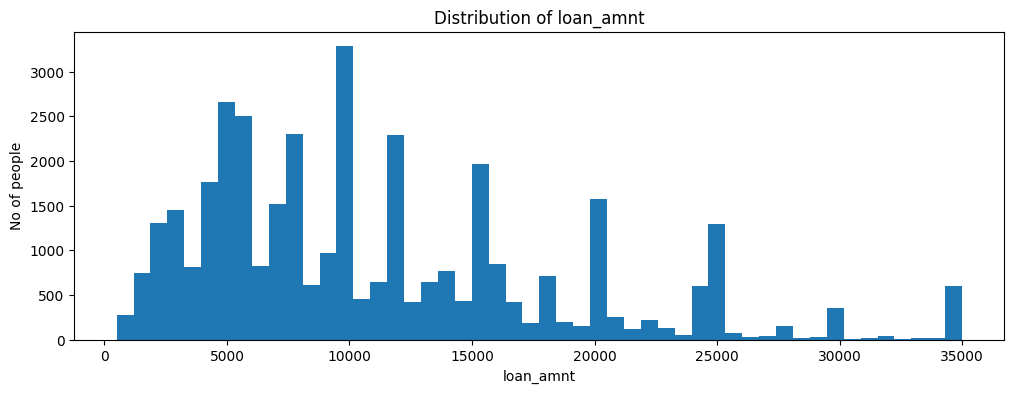

In [51]:
# Histogram for loan_amount
plt.figure(figsize=(12, 4))
plt.hist(df1.loan_amnt, bins=50)
plt.title(f'Distribution of loan_amnt')
plt.xlabel('loan_amnt')
plt.ylabel('No of people')
plt.show()

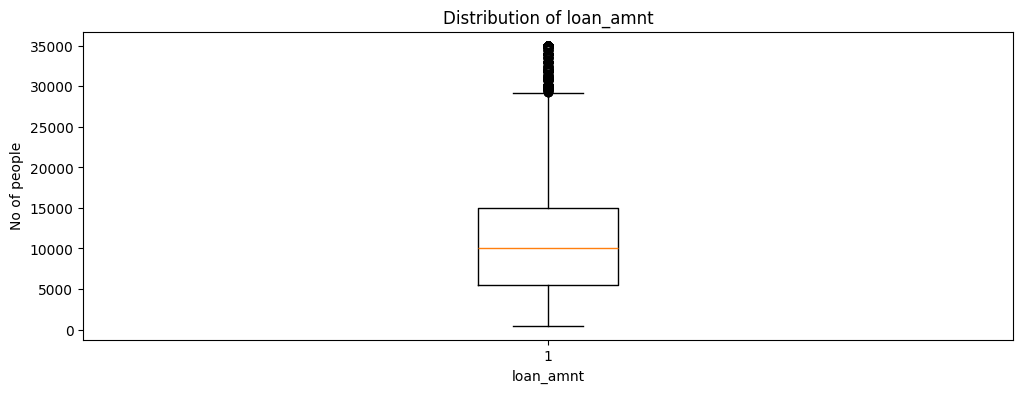

In [53]:
# box plot for loan_amount
plt.figure(figsize=(12, 4))
plt.boxplot(df1.loan_amnt)
plt.title(f'Distribution of loan_amnt')
plt.xlabel('loan_amnt')
plt.ylabel('No of people')
plt.show()

In [54]:
df1.loan_amnt.describe()

count    36800.000000
mean     11149.540761
std       7369.855703
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

**Conclusion**:
We can see the many people took the loan for **10000** rupees and same can be seen from box plot as well where median or **50th percentile is also 10000**. 

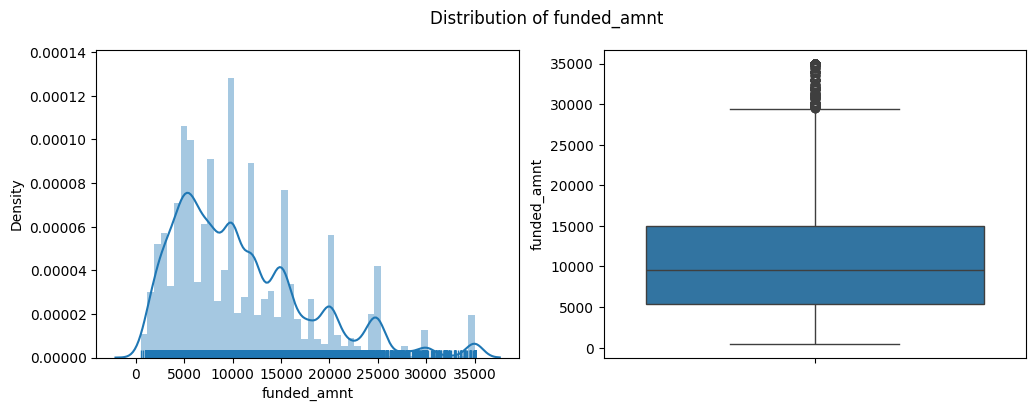

In [70]:
# distribution plot and boxplot for funded_amnt using seaborn
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=df1.funded_amnt, hist=True, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=df1.funded_amnt)
plt.suptitle('Distribution of funded_amnt')
plt.show()

In [71]:
df1.funded_amnt.describe()

count    36800.000000
mean     10880.794837
std       7109.157574
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

**Conclusion**: Here we can see that funded amount plots are very much similar as loan amounts plots. We can say that most of the loan amounts were applied were got approved

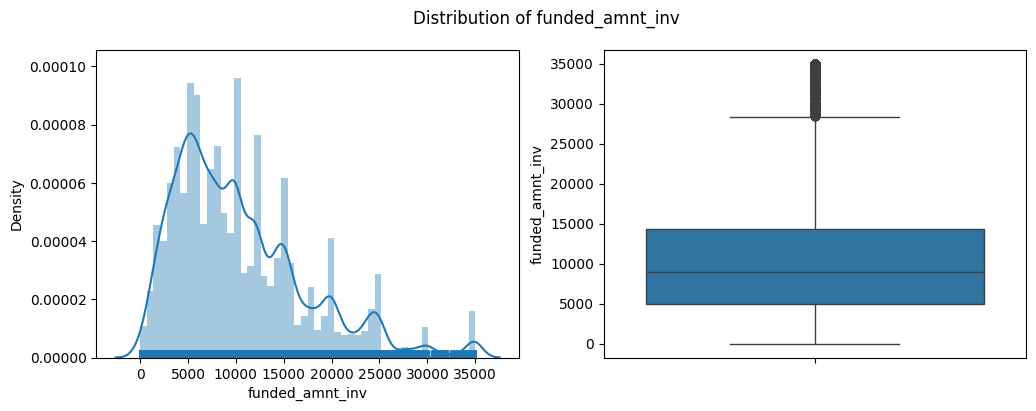

In [72]:
# distribution plot and boxplot for funded_amnt_inv using seaborn
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=df1.funded_amnt_inv, hist=True, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=df1.funded_amnt_inv)
plt.suptitle('Distribution of funded_amnt_inv')
plt.show()

In [73]:
df1.funded_amnt_inv.describe()

count    36800.000000
mean     10439.055845
std       7008.522880
min          0.000000
25%       5000.000000
50%       9000.000000
75%      14350.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

**Conclusion**: The total amount committed by investors for that loan at that point in time is almost the same as loan_amount. With the plots like the above box plot we can see that 50th percentile is still near to 10000 which tells us that company has approved the maximum amount of loan applied

**ratio of loan approved by company**

In [76]:
df1['approval_ratio'] = round(df1.funded_amnt_inv*100/df1.loan_amnt,2)

In [77]:
df1['approval_ratio'].describe()

count    36800.000000
mean        94.824049
std         15.016760
min          0.000000
25%         98.410000
50%         99.970000
75%        100.000000
max        100.000000
Name: approval_ratio, dtype: float64

**We can see that 75% borrowers were given 100% loan amount which they have applied for**

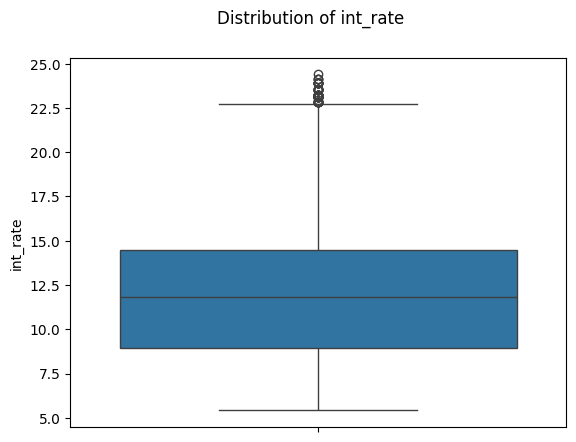

In [81]:
# boxplot for int_rate
sns.boxplot(data=df1.int_rate)
plt.suptitle('Distribution of int_rate')
plt.show()

In [82]:
df1.int_rate.describe()

count    36800.000000
mean        11.983745
std          3.701182
min          5.420000
25%          8.940000
50%         11.830000
75%         14.460000
max         24.400000
Name: int_rate, dtype: float64

**We can see that on an average interest rate was given was 11.83% while average range was between 8.94 and 14.46**

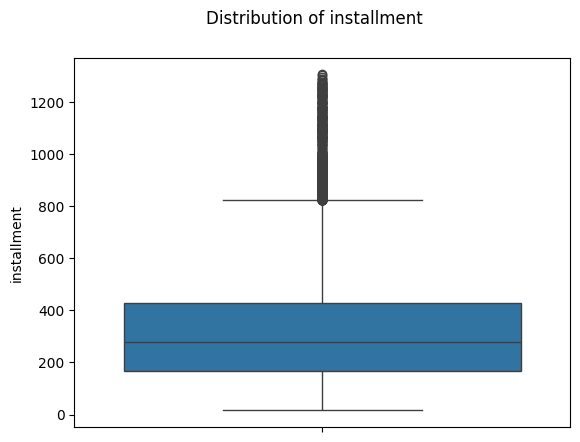

In [83]:
# boxplot for installment
sns.boxplot(data=df1.installment)
plt.suptitle('Distribution of installment')
plt.show()

In [84]:
df1.installment.describe()

count    36800.000000
mean       324.906537
std        208.891979
min         16.080000
25%        167.730000
50%        280.110000
75%        429.365000
max       1305.190000
Name: installment, dtype: float64

**The monthly payment owed by the borrower if the loan originates is Rs.280**

In [107]:
# analysis for annual_inc
pd.set_option('display.float_format', '{:.2f}'.format)
df1.annual_inc.describe()

count     36800.00
mean      69434.48
std       64021.59
min        4000.00
25%       41133.00
50%       60000.00
75%       83000.00
max     6000000.00
Name: annual_inc, dtype: float64

**The self-reported annual income provided by the borrower during registration for most of the borrowers ranges from 41000 to 830000**

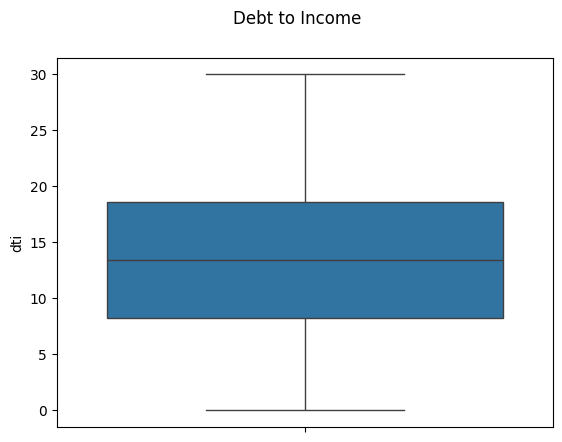

In [108]:
# boxplot for DTI
sns.boxplot(data=df1.dti)
plt.suptitle('Debt to Income')
plt.show()

In [109]:
df1.dti.describe()

count   36800.00
mean       13.33
std         6.65
min         0.00
25%         8.22
50%        13.43
75%        18.59
max        29.99
Name: dti, dtype: float64

**we can see that all the loans are approved where DTI was atmost 30%, there are no outliers**

In [110]:
# analysis for pub_rec which is public derogatory record
df1.pub_rec.describe()

count   36800.00
mean        0.05
std         0.24
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         4.00
Name: pub_rec, dtype: float64

**we can see that out of 36800 only 4% borroweres are having public derogatory records**

In [111]:
# analysis for pub_rec_bankruptcies
df1.pub_rec_bankruptcies.describe()

count   36800.00
mean        0.04
std         0.20
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         2.00
Name: pub_rec_bankruptcies, dtype: float64

**we can see that around 98% borrowers are not bankrupts**

## creating columns from date fields

In [116]:
# extracting month, year from issue_d column
df1['issue_d_year'] = df1.issue_d.dt.year
df1['issue_d_month'] = df1.issue_d.dt.strftime('%b')
df1['issue_d_year'] = df1['issue_d_year'].astype(object)

In [117]:
df1.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_amnt,pub_rec_bankruptcies,approval_ratio,issue_d_year,issue_d_month,earliest_cr_line_year,earliest_cr_line_month
0,1077501,5000,5000,4975.00,36,10.65,162.87,B,B2,10+ years,...,9,5863.16,5833.84,171.62,0.00,99.50,2011,Dec,2011,Dec
1,1077430,2500,2500,2500.00,60,15.27,59.83,C,C4,< 1 year,...,4,1008.71,1008.71,119.66,0.00,100.00,2011,Dec,2011,Dec
2,1077175,2400,2400,2400.00,36,15.96,84.33,C,C5,10+ years,...,10,3005.67,3005.67,649.91,0.00,100.00,2011,Dec,2011,Dec
3,1076863,10000,10000,10000.00,36,13.49,339.31,C,C1,10+ years,...,37,12231.89,12231.89,357.48,0.00,100.00,2011,Dec,2011,Dec
5,1075269,5000,5000,5000.00,36,7.90,156.46,A,A4,3 years,...,12,5632.21,5632.21,161.03,0.00,100.00,2011,Dec,2011,Dec


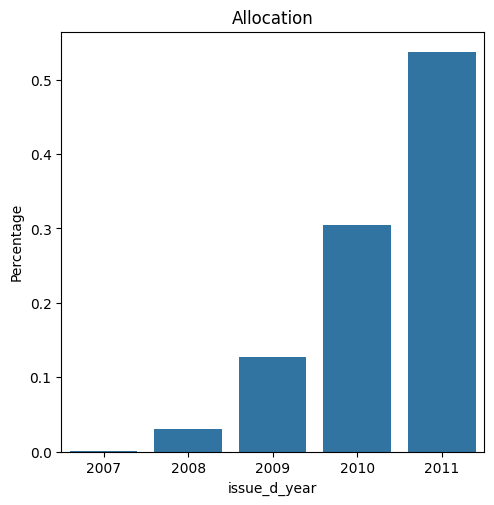

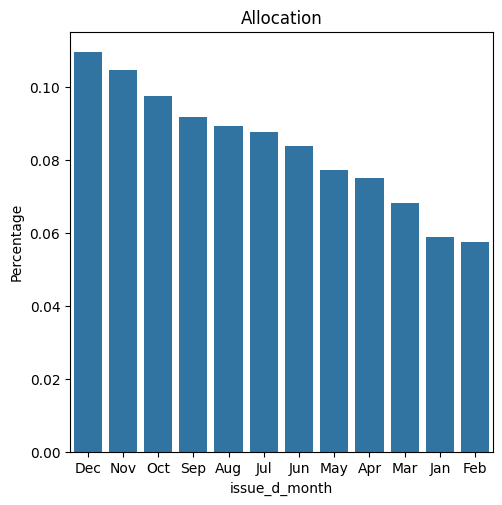

In [118]:
# analysing loans distribution across years and months for issue_d using bar plots
dates = ['issue_d_year', 'issue_d_month']
for date in dates:
    percent = df1[date].value_counts(normalize=True).reset_index()
    plt.figure(figsize=(12,12))
    plt.subplot(2,2,1)
    sns.barplot(x='index', y=date, data=percent)
    plt.xlabel(date)
    plt.ylabel('Percentage')
    plt.title('Allocation')
    plt.show()

**Company has increased the loan approvals every year and most of the loans were distributed in the months of Dec, Nov and October**

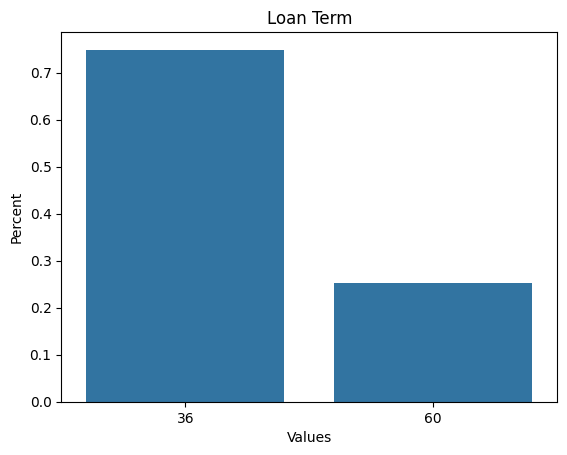

In [126]:
# analysing the terms column
percent = df1['term'].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y='term', data=percent)
plt.ylabel('Percent')
plt.xlabel('Values')
plt.title('Loan Term')
plt.show()

**most of the loans are approved for 36 months**

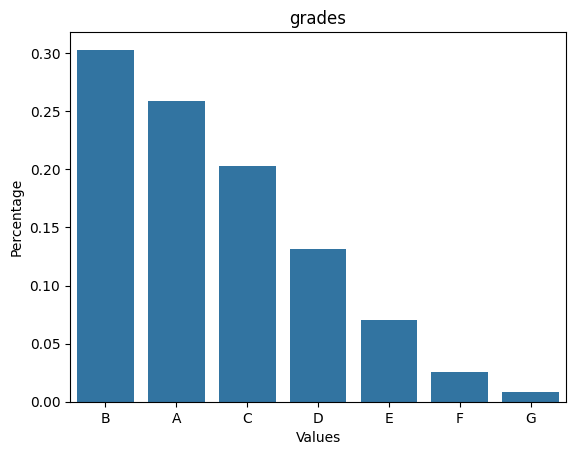

In [125]:
# calculating percentage for grade columns and analysing
percent = df1['grade'].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y='grade', data=percent)
plt.xlabel('Values')
plt.ylabel('Percentage')
plt.title('grades')
plt.show()

**most of the borrowers are from B and A grades and least are from G**

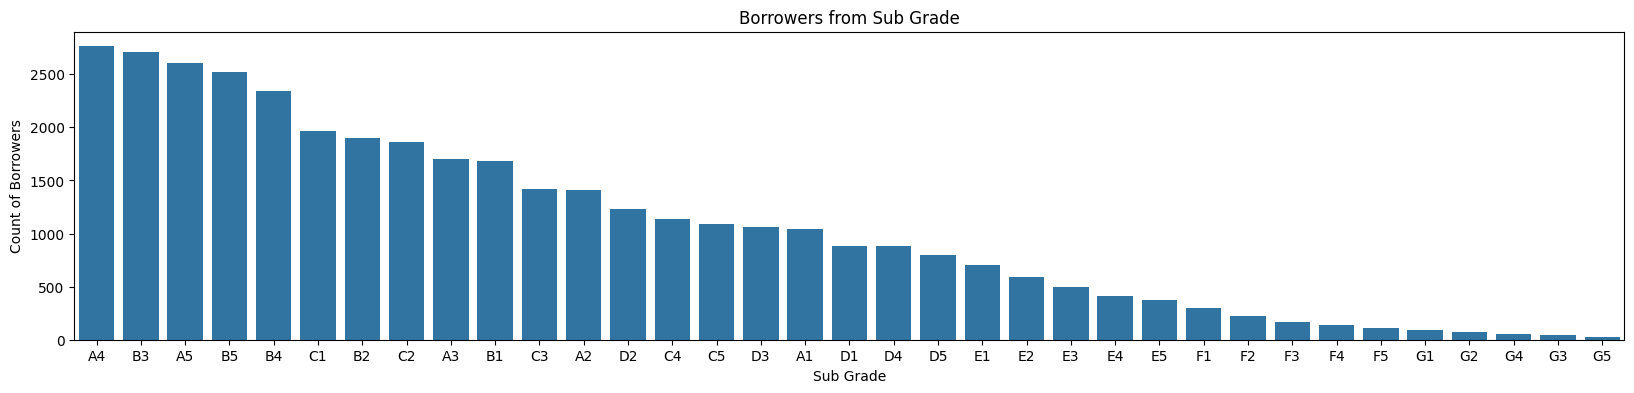

In [133]:
# plotting graphs for grades and sub grades for better understanding
plt.figure(figsize=(20,4))
sns.countplot(x=df1.sub_grade, order=df1.sub_grade.value_counts().index)
plt.title('Borrowers from Sub Grade')
plt.xlabel('Sub Grade')
plt.ylabel('Count of Borrowers')
plt.show()

**we can see that A4, B3, A5, B5 and B4 are the most loan seeking subgrades borrowers**

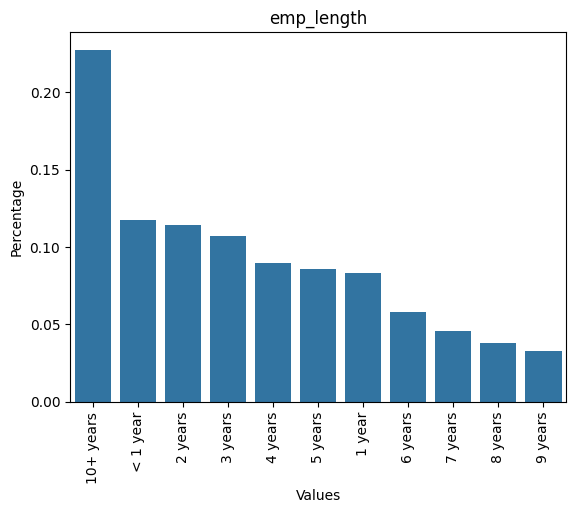

In [135]:
# plotting graphs for employment length
percent = df1['emp_length'].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y='emp_length', data=percent)
plt.xticks(rotation=90)
plt.xlabel('Values')
plt.ylabel('Percentage')
plt.title('emp_length')
plt.show()

**most of the borrowers are experienced with 10+ years of experience**

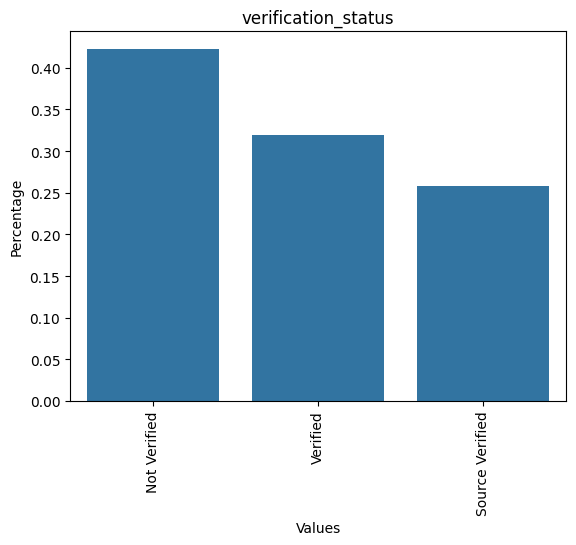

In [136]:
# plotting graphs for verification status
percent = df1['verification_status'].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y='verification_status', data=percent)
plt.xticks(rotation=90)
plt.xlabel('Values')
plt.ylabel('Percentage')
plt.title('verification_status')
plt.show()

**this indicates that most of the loans given without verifying the borrowers income**

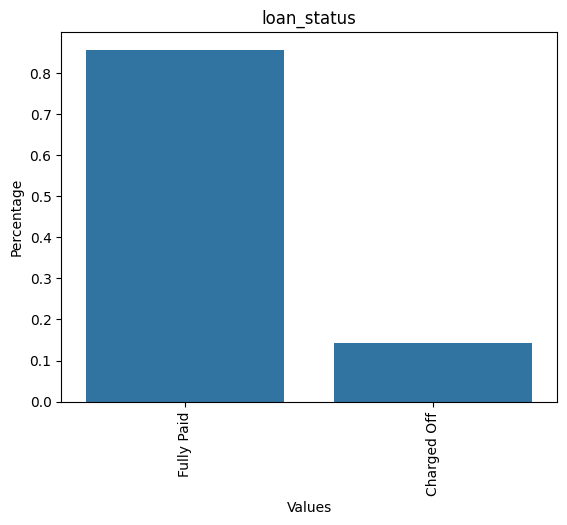

In [137]:
# plotting graphs for Loan status
percent = df1['loan_status'].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y='loan_status', data=percent)
plt.xticks(rotation=90)
plt.xlabel('Values')
plt.ylabel('Percentage')
plt.title('loan_status')
plt.show()

**Around 85% borrowers fully paid the loan while around 15% defaulted the loan**

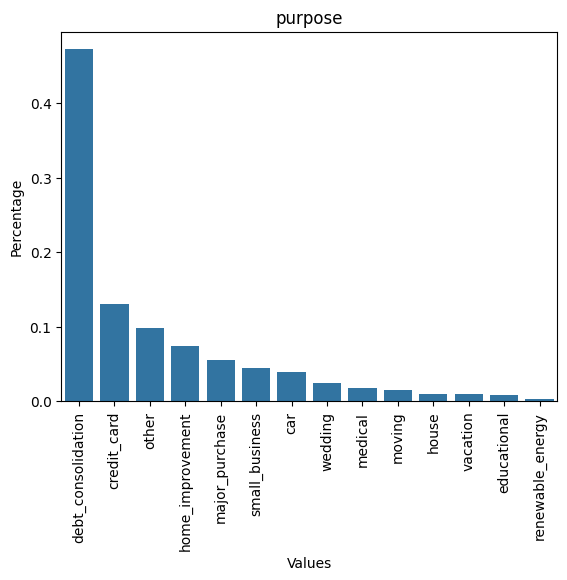

In [138]:
# analysing purpose column
percent = df1['purpose'].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y='purpose', data=percent)
plt.xticks(rotation=90)
plt.xlabel('Values')
plt.ylabel('Percentage')
plt.title('purpose')
plt.show()

**we can see that most of the borroweres took loan for debt consolidation**

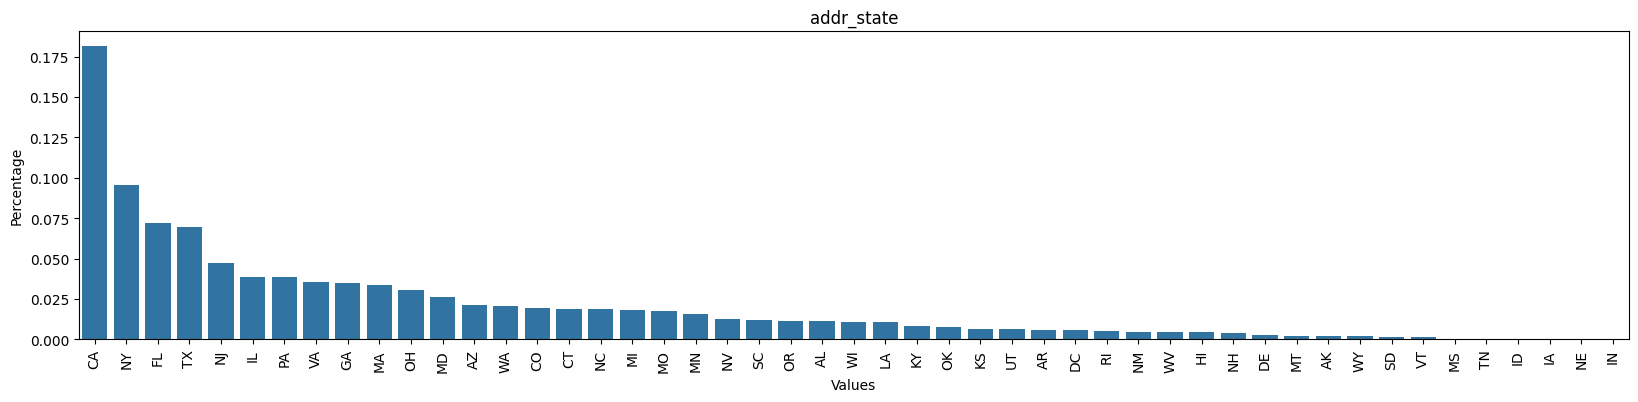

In [140]:
# analyzing for addr_state
plt.figure(figsize=(20,4))
percent = df1['addr_state'].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y='addr_state', data=percent)
plt.xticks(rotation=90)
plt.xlabel('Values')
plt.ylabel('Percentage')
plt.title('addr_state')
plt.show()

**most of the borrowers are from CA and NY and very few are from IN**

# SEGMENTED UNIVARIATE ANALYSIS

## Loan Amount vs Loan Status

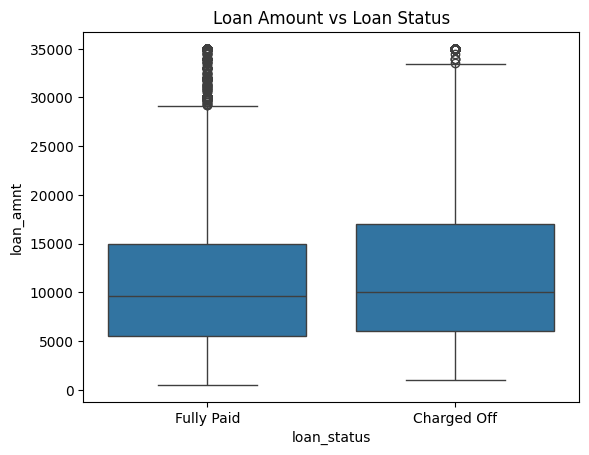

In [143]:
sns.boxplot(x='loan_status', y=df1.loan_amnt, data=df1)
plt.title('Loan Amount vs Loan Status')
plt.show()

**loans which are charged off are of higher amounts than the loans getting fully paid**

## Loan Amount vs Purpose

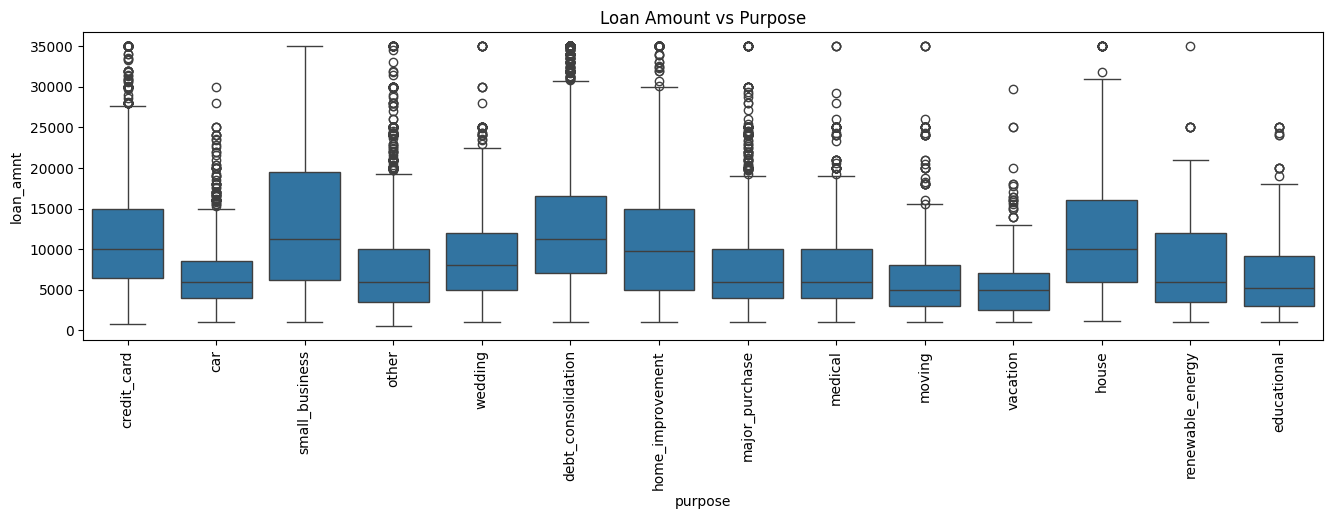

In [147]:
plt.figure(figsize=(16,4))
sns.boxplot(x='purpose', y=df1.loan_amnt, data=df1)
plt.title('Loan Amount vs Purpose')
plt.xticks(rotation=90)
plt.show()

**we can see small business took more loan amounts**

## Loan Status vs Interest Rates

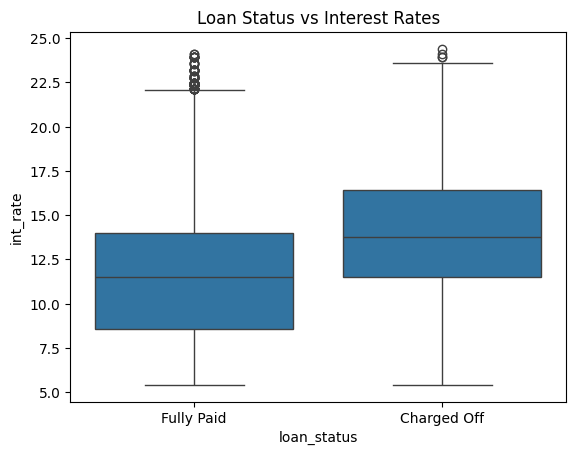

In [151]:
sns.boxplot(x='loan_status', y=df1.int_rate, data=df1)
plt.title('Loan Status vs Interest Rates')
plt.show()

**we can clearly see that higher the interest rate, chance of getting defaulted is more**

## Interest Rate vs Purpose

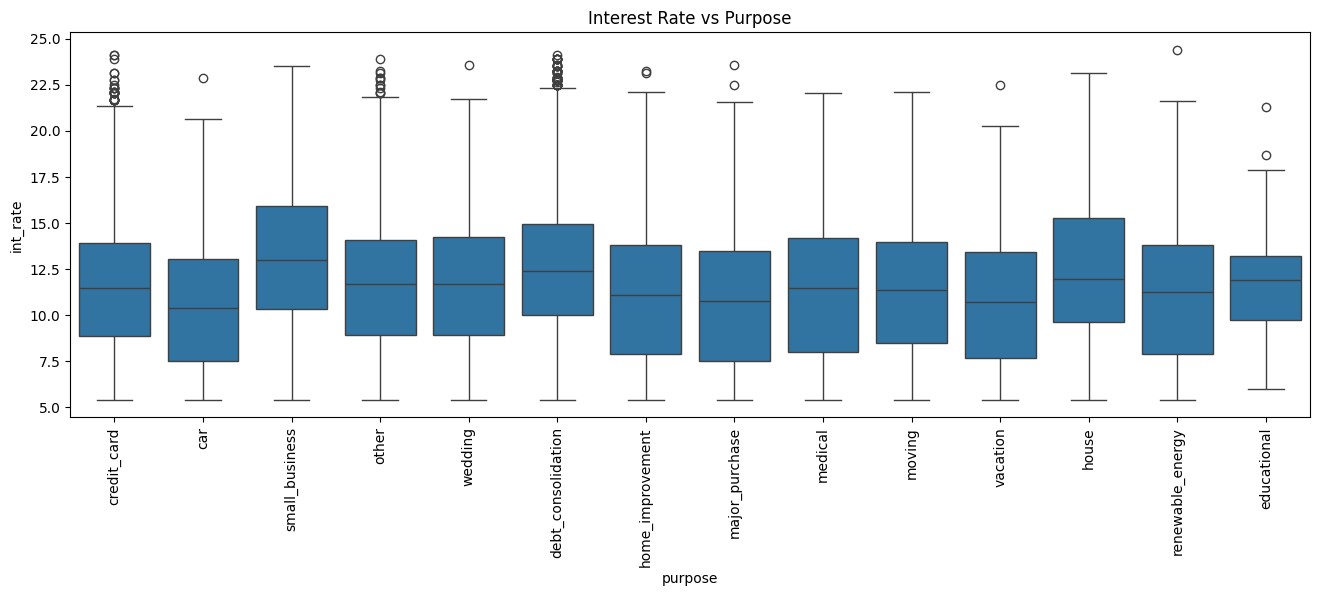

In [152]:
plt.figure(figsize=(16,5))
sns.boxplot(x='purpose', y=df1.int_rate, data=df1)
plt.xticks(rotation=90)
plt.title('Interest Rate vs Purpose')
plt.show()

**we can see small business, debt consolidation anf house are given higher interset rates**

## pub_rec, number of public derogatory records

In [169]:
df2 = df1.groupby(['pub_rec', 'term'], as_index=False)['id'].count()
df2['percent'] = df2.groupby('pub_rec')['id'].apply(lambda x: x/x.sum())
df2

,pub_rec,term,id,percent
0,0,36,26152,0.75
1,0,60,8719,0.25
2,1,36,1349,0.72
3,1,60,526,0.28
4,2,36,36,0.80
5,2,60,9,0.20
6,3,36,7,1.00
7,4,36,2,1.00


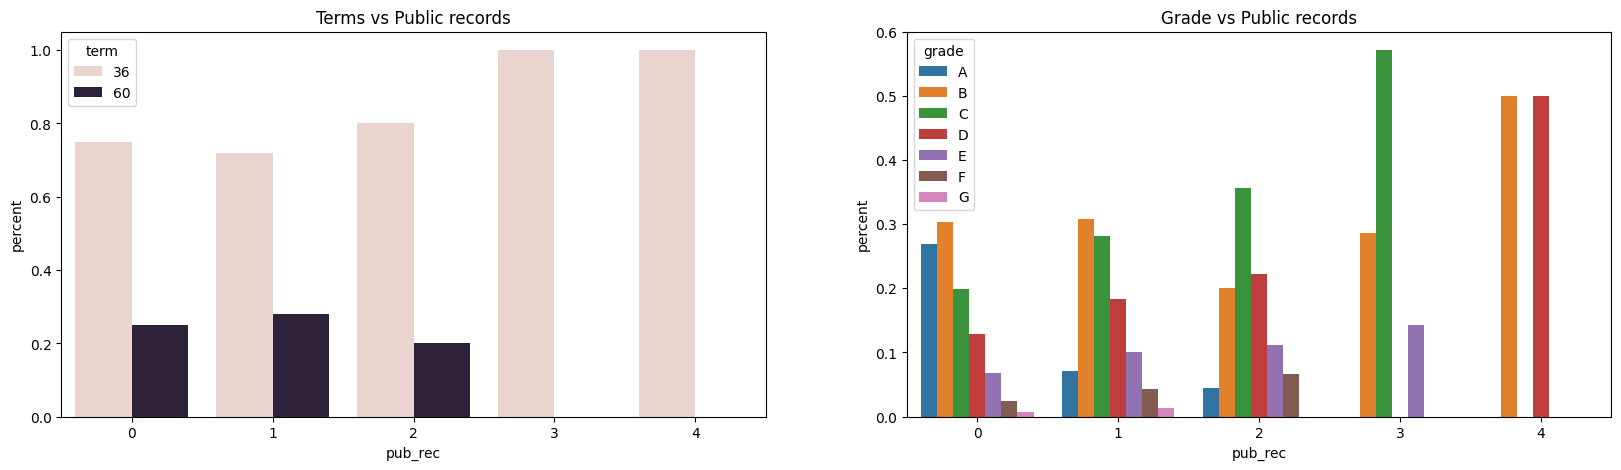

In [170]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.barplot(x='pub_rec', y='percent', hue='term', data=df2)
plt.title('Terms vs Public records')

df2 = df1.groupby(['pub_rec', 'grade'], as_index=False)['id'].count()
df2['percent'] = df2.groupby('pub_rec')['id'].apply(lambda x: x/x.sum())
plt.subplot(122)
plt.title('Grade vs Public records')
grade_ord = df1.grade.unique()
grade_ord.sort()
sns.barplot(x='pub_rec', y='percent', hue='grade', data=df2)
plt.show()

**1) we can see that A grade people have very less derogatory records**</br>
**2) C,D and E grades are having very high derogatory records**</br>
**3) people who have high derogatory records took loans for 36 months**

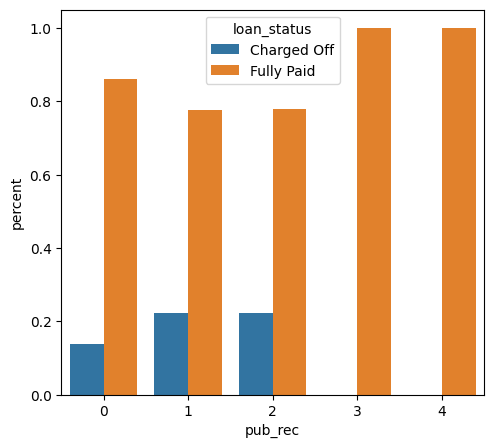

In [173]:
df2 = df1.groupby(['pub_rec', 'loan_status'], as_index=False)['id'].count()
df2['percent'] = df2.groupby('pub_rec')['id'].apply(lambda x: x/x.sum())

plt.figure(figsize=(12,5))
plt.subplot(121)
sns.barplot(x='pub_rec', y='percent', hue='loan_status', data=df2)
plt.show()

**borrowers with derogatory records from 0 to 2 has defaulted the loans**

# BIVARIATE ANALYSIS

## Loan Status vs Terms

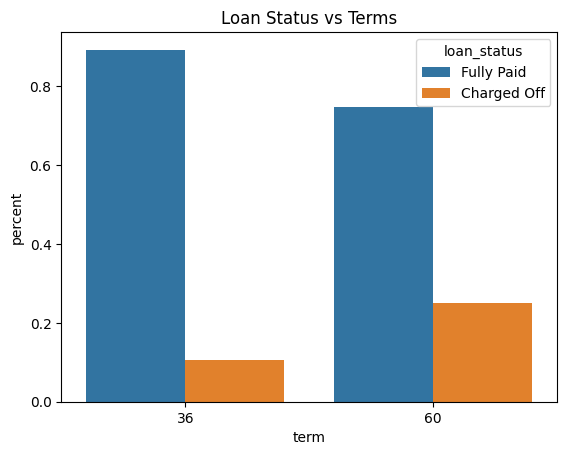

In [174]:
df2 = df1.groupby(['term', 'loan_status'], as_index=False)['id'].count()
df2['percent'] = df2.groupby('term')['id'].apply(lambda x: x/x.sum())
sns.barplot(x='term', y='percent', hue='loan_status', data=df2, hue_order = ['Fully Paid', 'Charged Off'])
plt.title('Loan Status vs Terms')
plt.show()

**borrowers took loans for 36 months are most likely to fully paid the loan. However, more defaulters are present in 60 months term**

Text(0.5, 1.0, 'Term vs loan amount')

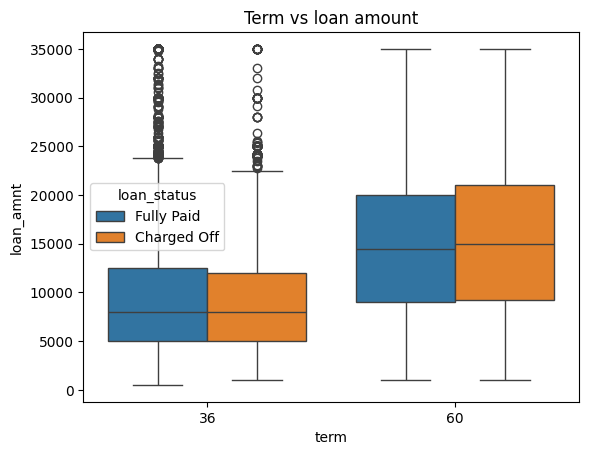

In [175]:
sns.boxplot(x='term', y='loan_amnt', hue='loan_status', data=df1)
plt.title('Term vs loan amount')

**both types of borrowers took similar kind of loan for both terms**

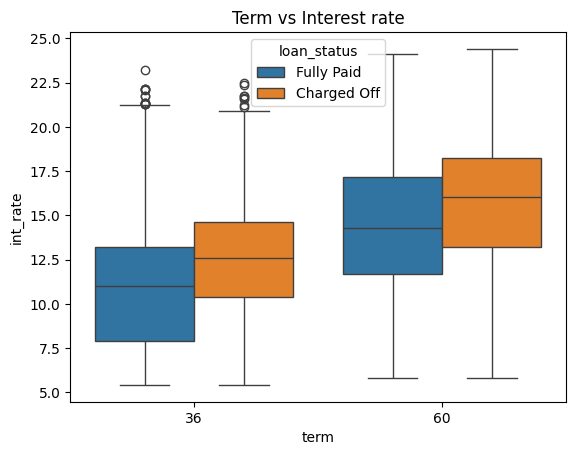

In [176]:
sns.boxplot(x='term', y='int_rate', hue='loan_status', data=df1)
plt.title('Term vs Interest rate')
plt.show()

**for higher interest rates defaulters are present in both the terms**

Text(0.5, 1.0, 'Grade vs Loan status')

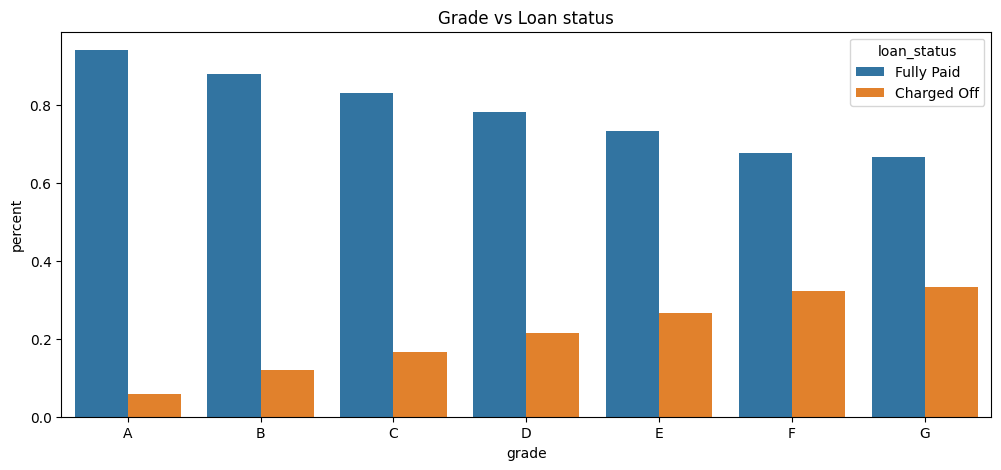

In [177]:
df2 = df1.groupby(['grade', 'loan_status'], as_index=False)['id'].count()
df2['percent'] = df2.groupby('grade')['id'].apply(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='grade', y='percent', hue='loan_status', data=df2, hue_order = ['Fully Paid', 'Charged Off'])
plt.title('Grade vs Loan status')

**we can clearly see that as the grade goes from A to G, defaulters are increasing**

**with this we can say that lower grade people took the loans are more likely to default the loan**

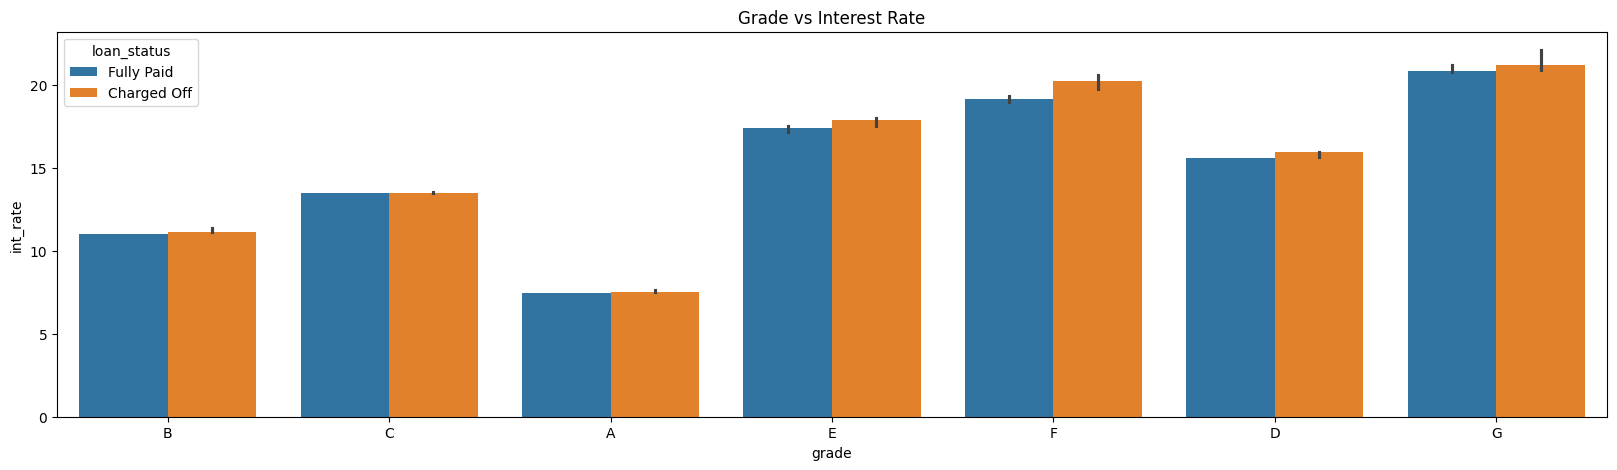

In [181]:
plt.figure(figsize=(20,5))
sns.barplot(x='grade', y='int_rate', hue='loan_status', data=df1, estimator=np.median)
plt.title('Grade vs Interest Rate')
plt.show()

**lower grade borroweres took the loans of higher interest rate and they are more likely to default as we can see in these plots**

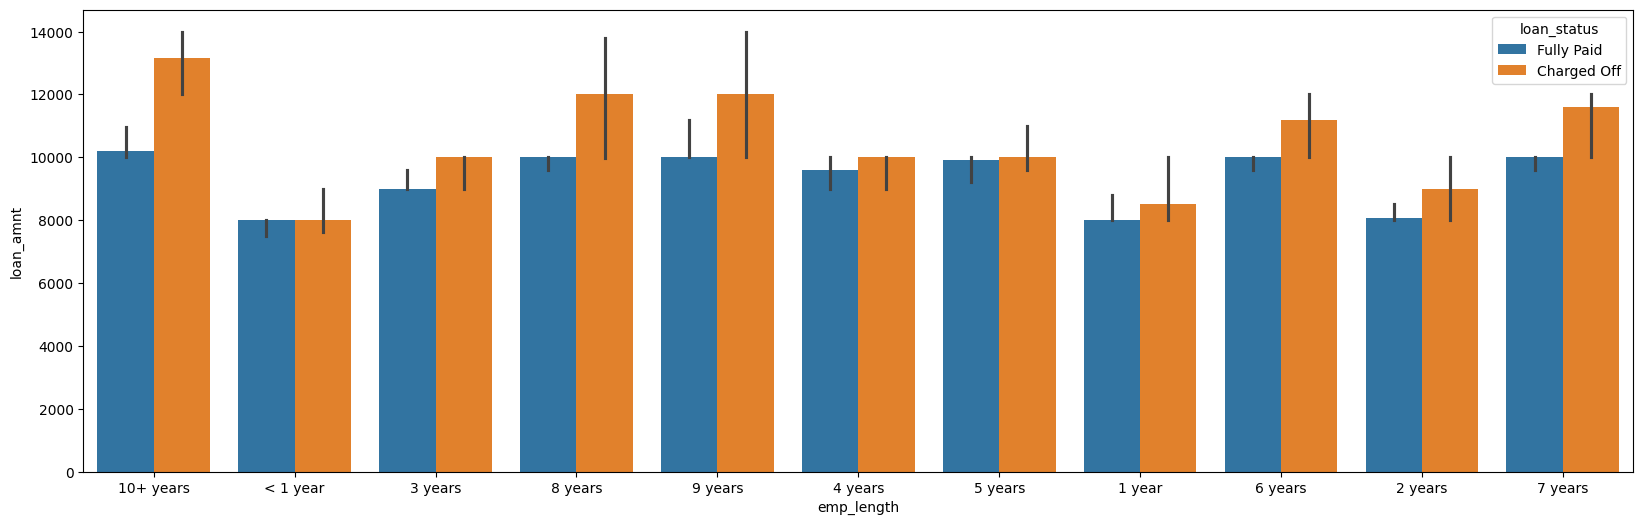

In [180]:
plt.figure(figsize=(20,6))
sns.barplot(x='emp_length', y='loan_amnt', hue='loan_status', data=df1, estimator=np.median)
plt.show()

**borrowers with high employment length are more likely to default**

## Let's see from which city defaulters are more

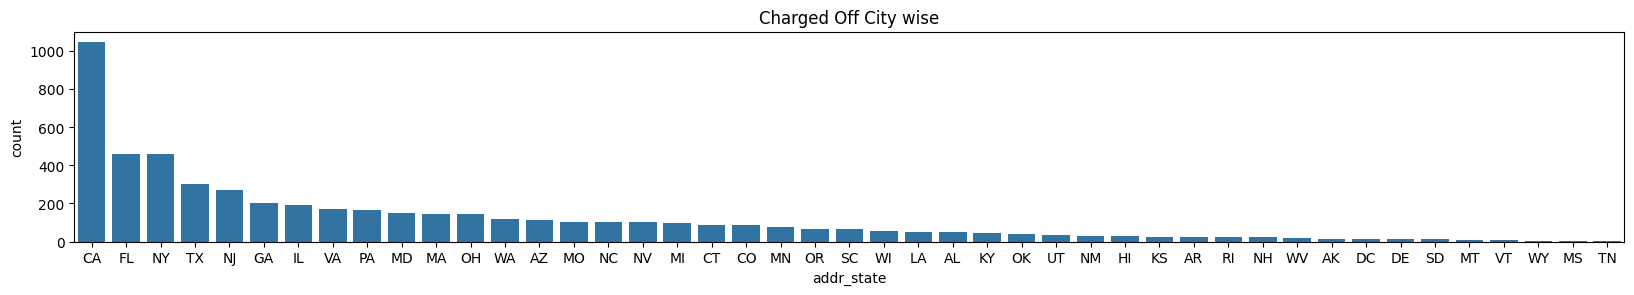

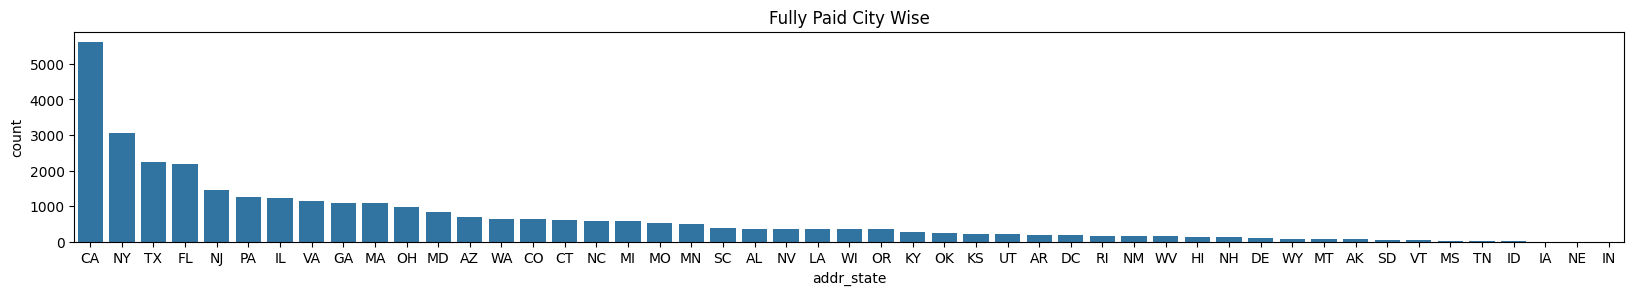

In [183]:
# create another data set with only charged off data
defaulters_df = df1[df1.loan_status.values == 'Charged Off']
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.countplot(x='addr_state', data=defaulters_df, order=defaulters_df.addr_state.value_counts().index)
plt.title('Charged Off City wise')

# create another data set with only fully paid data
fullPaid_df = df1[df1.loan_status.values == 'Fully Paid']
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.countplot(x='addr_state', data=fullPaid_df, order=fullPaid_df.addr_state.value_counts().index)
plt.title('Fully Paid City Wise')
plt.show()

**borrowers from CA,FL,NY are defaulted more**</br>**borrowers from CA,NY fully paid as well in the large numbers**

## Let's see what purpose leads to more defaulters

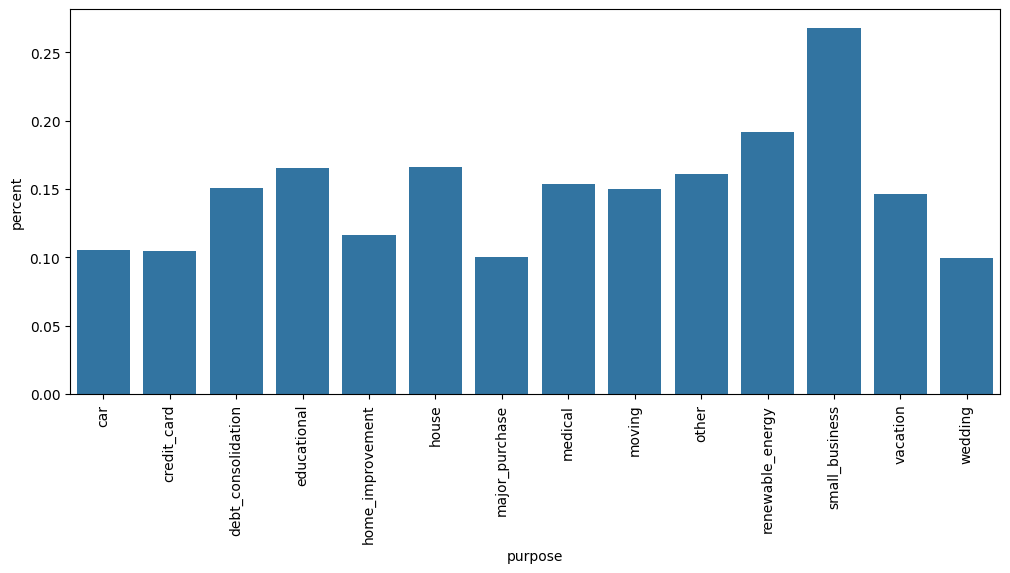

In [185]:
df2 = df1.groupby(['purpose', 'loan_status'], as_index=False)['id'].count()
df2['percent'] = df2.groupby('purpose')['id'].apply(lambda x: x/x.sum())
df2 = df2[df2.loan_status == 'Charged Off']
plt.figure(figsize=(12,5))
sns.barplot(x='purpose', y='percent', data=df2)
plt.xticks(rotation=90)
plt.show()

**We can see small_business contains more defaulters**

# Correlation Matrix

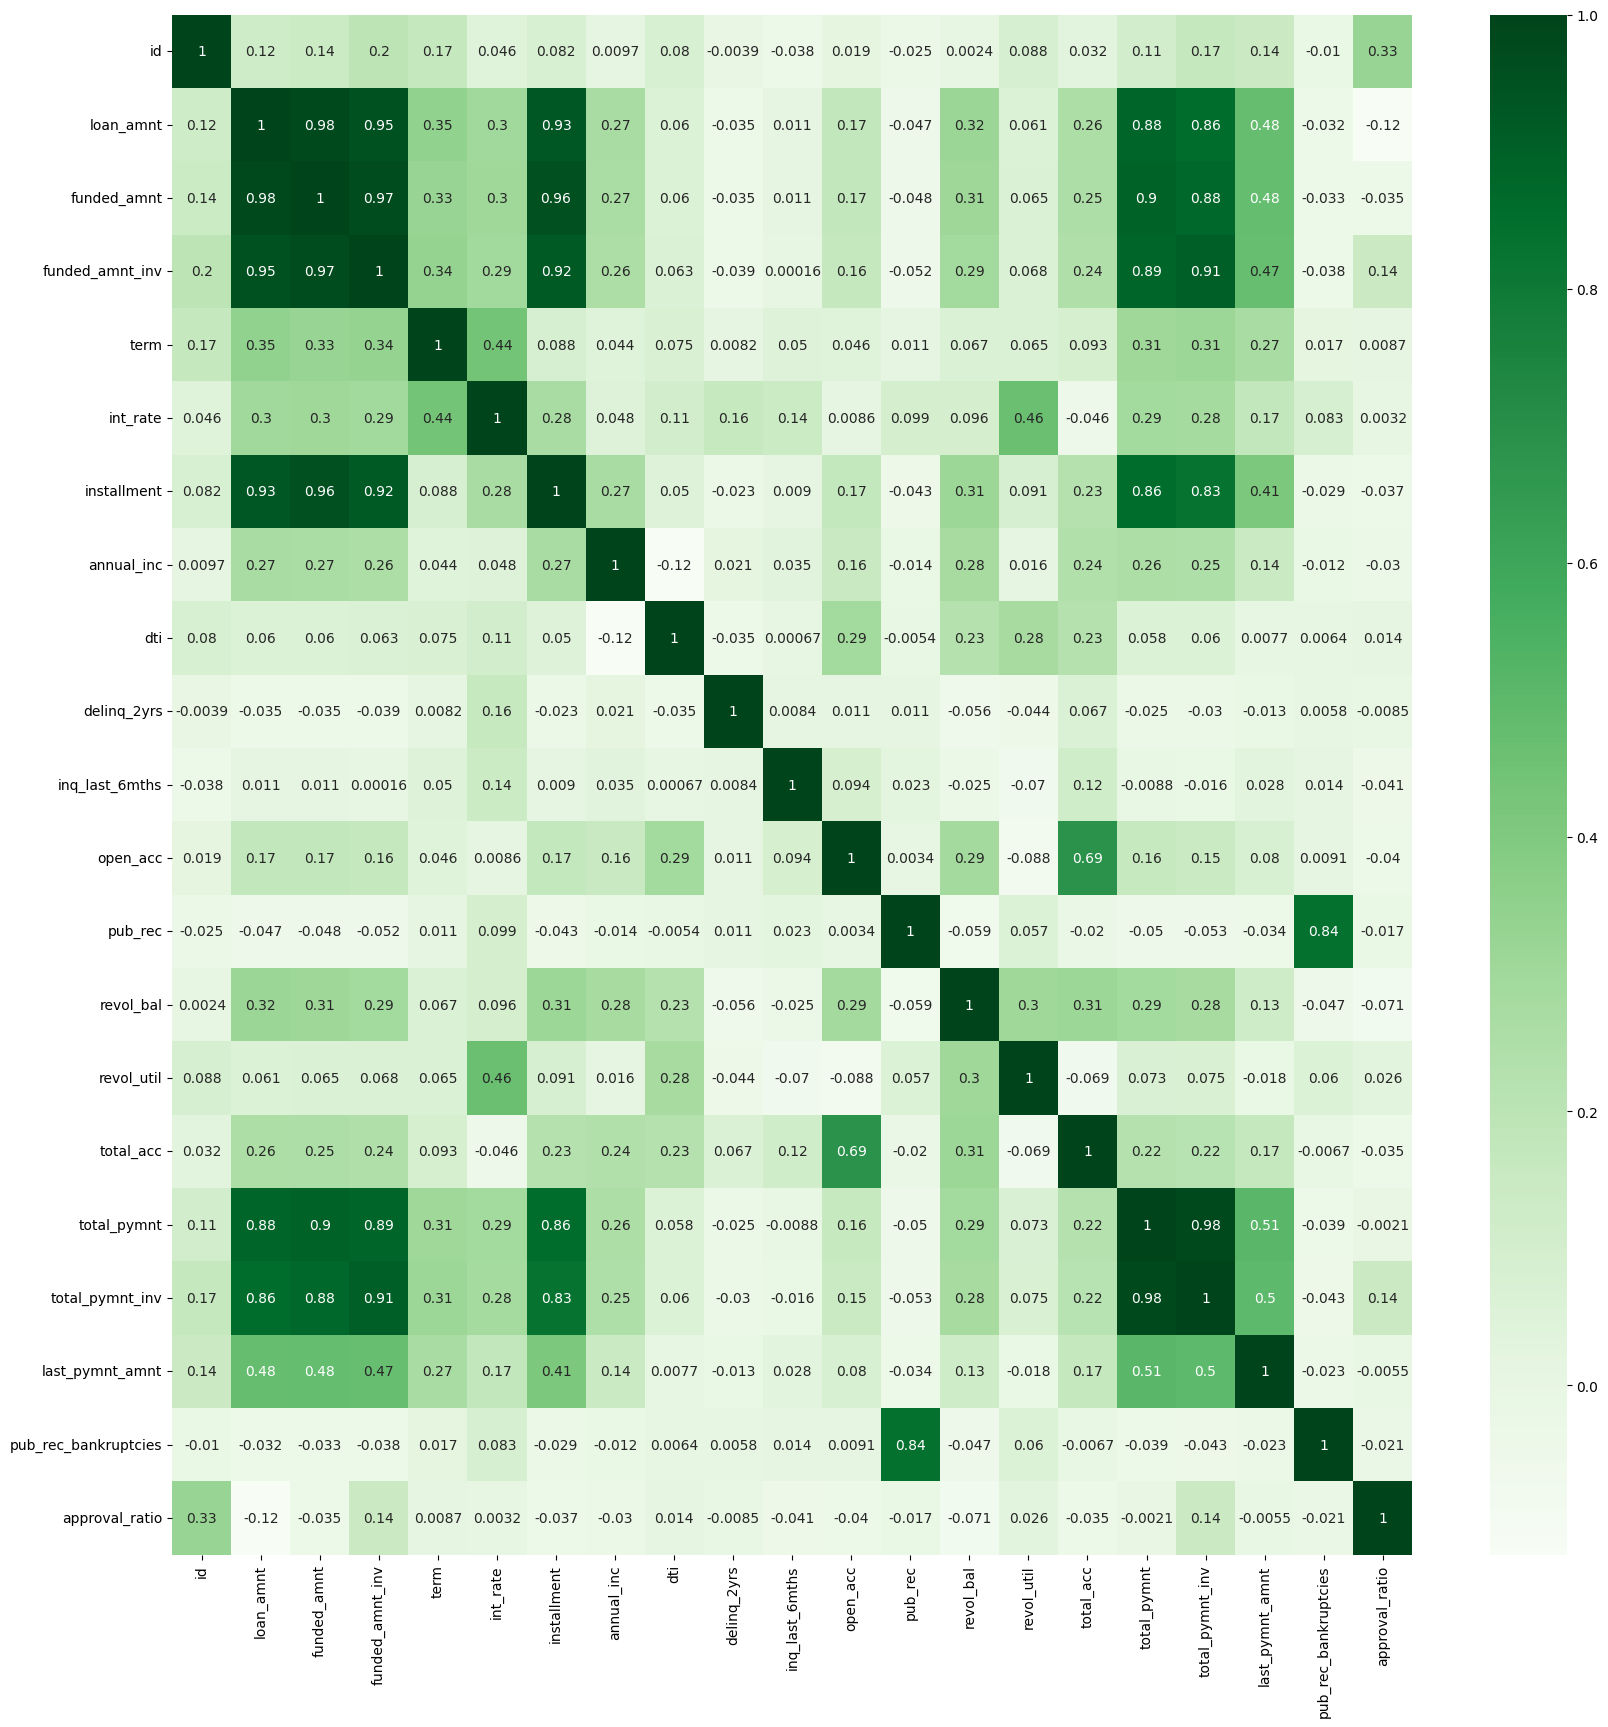

In [190]:
# using heat map
corr_matrix = df1.corr()
plt.figure(figsize=(20,20))
ax = sns.heatmap(corr_matrix, annot = True, cmap='Greens')
plt.show()

## Final Observation

**High Correlation Between Loan Amounts:**
* loan_amnt, funded_amnt, funded_amnt_inv, installment, and total_pymnt all have very high positive correlations with each other (above 0.9). 
* This indicates that these variables are closely related, which makes sense since they all pertain to the loan size and payments.

**Interest Rate (int_rate) Relationships:**

* int_rate has a moderate positive correlation with loan_amnt (0.3) and funded_amnt (0.3), indicating that larger loans may have slightly higher interest rates.

* int_rate is also positively correlated with dti (0.16), which means loans given to borrowers with higher debt-to-income ratios tend to have higher interest rates.

**Income and Loan Size:**
* annual_inc has a very weak correlation with loan_amnt (0.27) and funded_amnt (0.27). This suggests that the loan amount isn’t strongly influenced by the borrower's income.

**Revolving Balance and Utilization:**

* revol_bal and revol_util show a moderate correlation of 0.46, indicating that as the revolving balance increases, the utilization rate also tends to increase.

* revol_util also has a weak correlation with loan_amnt (0.061), implying that higher utilization might be slightly associated with larger loans.

**Delinquency and Credit Inquiries:**
* delinq_2yrs and inq_last_6mths have a weak correlation of 0.25. This suggests that borrowers with a history of delinquency in the past 2 years might have slightly more recent credit inquiries.

**Public Records and Bankruptcies:**
* pub_rec and pub_rec_bankruptcies have a high correlation of 0.84. This is expected since both variables likely represent similar information about negative public records like bankruptcies.


**Total Payment and Investment:**
* total_pymnt and total_pymnt_inv have a perfect correlation of 1. This is expected because these variables should represent the total payments made and the corresponding investments, which are inherently linked.

**Approved Loan Amount Ratio:**
* The approved_loan_amnt_ratio has a weak negative correlation with most of the other features, indicating that the ratio of the approved loan amount is not strongly related to other variables in the dataset.